In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import tensorflow as tf
import streamlit as st
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.1


In [2]:
df = yf.Ticker("LNG")

In [3]:
df = df.history(period="max")

In [4]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1994-04-04 00:00:00-04:00,23.631199,23.631199,23.631199,23.631199,167,0.0,0.0
1994-04-05 00:00:00-04:00,32.492900,35.446800,32.492900,35.446800,167,0.0,0.0
1994-04-06 00:00:00-04:00,35.446800,35.446800,35.446800,35.446800,0,0.0,0.0
1994-04-07 00:00:00-04:00,35.446800,35.446800,35.446800,35.446800,0,0.0,0.0
1994-04-08 00:00:00-04:00,35.446800,35.446800,35.446800,35.446800,0,0.0,0.0


In [10]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
Date,,,,,,,,
2023-03-06 00:00:00-05:00,159.059998,161.000000,155.690002,156.550003,3084500,0.0,0.0,155.710007
2023-03-07 00:00:00-05:00,156.520004,156.520004,153.600006,155.710007,1666300,0.0,0.0,155.179993
2023-03-08 00:00:00-05:00,154.500000,156.990005,152.800003,155.179993,1411200,0.0,0.0,153.149994
2023-03-09 00:00:00-05:00,154.520004,155.820007,152.059998,153.149994,1743600,0.0,0.0,154.229996
2023-03-10 00:00:00-05:00,153.149994,156.179993,151.000000,154.229996,2818100,0.0,0.0,NaN


In [5]:
backupdf = df

In [6]:
df["Tomorrow"] = df["Close"].shift(-1)

In [7]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Tomorrow        1
dtype: int64

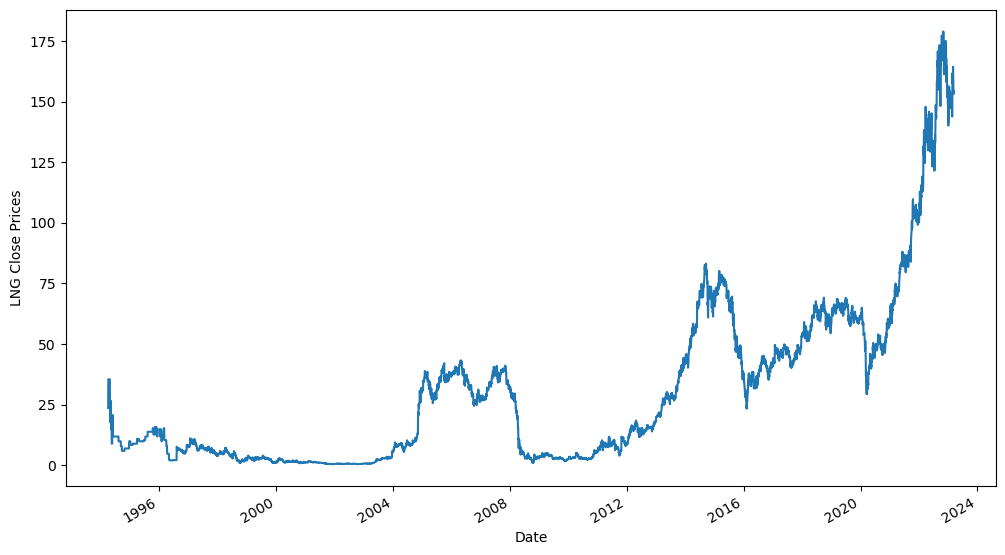

In [8]:
df.Close.plot(figsize=(12, 7))
plt.ylabel("LNG Close Prices")
plt.show()

In [11]:
del df["Dividends"]
del df["Stock Splits"]

In [12]:
df

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1994-04-04 00:00:00-04:00,23.631199,23.631199,23.631199,23.631199,167,35.446800
1994-04-05 00:00:00-04:00,32.492900,35.446800,32.492900,35.446800,167,35.446800
1994-04-06 00:00:00-04:00,35.446800,35.446800,35.446800,35.446800,0,35.446800
1994-04-07 00:00:00-04:00,35.446800,35.446800,35.446800,35.446800,0,35.446800
1994-04-08 00:00:00-04:00,35.446800,35.446800,35.446800,35.446800,0,35.446800
...,...,...,...,...,...,...
2023-03-06 00:00:00-05:00,159.059998,161.000000,155.690002,156.550003,3084500,155.710007
2023-03-07 00:00:00-05:00,156.520004,156.520004,153.600006,155.710007,1666300,155.179993
2023-03-08 00:00:00-05:00,154.500000,156.990005,152.800003,155.179993,1411200,153.149994


In [16]:
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)

In [17]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1994-04-04 00:00:00-04:00,23.631199,23.631199,23.631199,23.631199,167,35.446800,1
1994-04-05 00:00:00-04:00,32.492900,35.446800,32.492900,35.446800,167,35.446800,0
1994-04-06 00:00:00-04:00,35.446800,35.446800,35.446800,35.446800,0,35.446800,0
1994-04-07 00:00:00-04:00,35.446800,35.446800,35.446800,35.446800,0,35.446800,0
1994-04-08 00:00:00-04:00,35.446800,35.446800,35.446800,35.446800,0,35.446800,0
...,...,...,...,...,...,...,...
2023-03-06 00:00:00-05:00,159.059998,161.000000,155.690002,156.550003,3084500,155.710007,0
2023-03-07 00:00:00-05:00,156.520004,156.520004,153.600006,155.710007,1666300,155.179993,0
2023-03-08 00:00:00-05:00,154.500000,156.990005,152.800003,155.179993,1411200,153.149994,0


In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = df.iloc[:-100]
test = df.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [21]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5342465753424658

<AxesSubplot:xlabel='Date'>

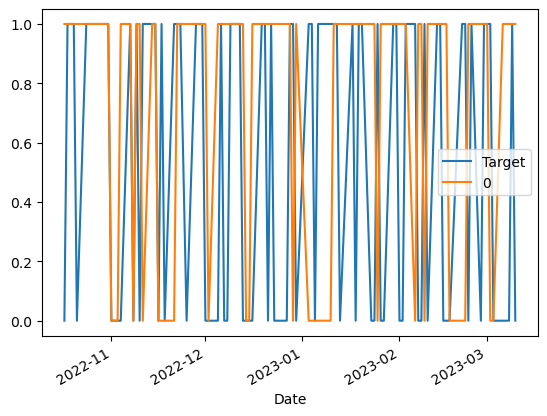

In [22]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [23]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [24]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [25]:
predictions = backtest(df, model, predictors)

In [26]:
predictions["Predictions"].value_counts()

0    2795
1    1991
Name: Predictions, dtype: int64

In [27]:
precision_score(predictions["Target"], predictions["Predictions"])

0.48518332496233046

In [28]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.501254
0    0.498746
Name: Target, dtype: float64

In [29]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [30]:
df = df.dropna(subset=df.columns[df.columns != "Tomorrow"])

In [31]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1998-03-19 00:00:00-05:00,5.041323,5.297328,4.805011,4.923167,5650,4.549006,0,0.988142,0.0,0.939143,3.0,1.025641,24.0,0.793731,96.0,0.554469,165.0
1998-03-20 00:00:00-05:00,4.923166,4.923166,4.549006,4.549006,8850,4.923167,1,0.960499,0.0,0.893271,2.0,0.946269,24.0,0.735809,96.0,0.514118,164.0
1998-03-23 00:00:00-05:00,4.549006,5.179172,4.549006,4.923167,13950,4.923167,0,1.039501,1.0,0.985804,2.0,1.021520,24.0,0.798814,96.0,0.558331,165.0
1998-03-24 00:00:00-05:00,4.805011,5.179172,4.805011,4.923167,3600,5.356405,1,1.000000,1.0,1.010509,1.0,1.018053,24.0,0.801313,96.0,0.560271,165.0
1998-03-25 00:00:00-05:00,5.179171,5.671488,5.179171,5.356405,22650,6.025956,1,1.042146,1.0,1.085395,2.0,1.102703,24.0,0.874036,97.0,0.611669,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-06 00:00:00-05:00,159.059998,161.000000,155.690002,156.550003,3084500,155.710007,0,0.975602,1.0,0.975535,3.0,1.026058,32.0,1.045758,132.0,1.762337,515.0
2023-03-07 00:00:00-05:00,156.520004,156.520004,153.600006,155.710007,1666300,155.179993,0,0.997310,0.0,0.972276,3.0,1.021917,31.0,1.039515,132.0,1.751164,514.0
2023-03-08 00:00:00-05:00,154.500000,156.990005,152.800003,155.179993,1411200,153.149994,0,0.998295,0.0,0.975803,2.0,1.019273,31.0,1.035356,132.0,1.743490,514.0


In [32]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [33]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [34]:
predictions = backtest(df, model, new_predictors)

In [35]:
predictions["Predictions"].value_counts()

0.0    3671
1.0     115
Name: Predictions, dtype: int64

In [36]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5652173913043478

In [37]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.503434
0    0.496566
Name: Target, dtype: float64

In [38]:
predictions

,Target,Predictions
Date,,
2008-02-27 00:00:00-05:00,1,0.0
2008-02-28 00:00:00-05:00,1,0.0
2008-02-29 00:00:00-05:00,1,0.0
2008-03-03 00:00:00-05:00,0,0.0
2008-03-04 00:00:00-05:00,1,0.0
...,...,...
2023-03-06 00:00:00-05:00,0,0.0
2023-03-07 00:00:00-05:00,0,1.0
2023-03-08 00:00:00-05:00,0,1.0
